# "Изменение разрешения данных"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

# Понижение разрешения (downsampling)

In [2]:
df = pd.read_csv('input/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 02:01:00,1305.3,1305.9,1304.6,1304.7,407
1,2018-01-02 02:02:00,1304.7,1305.1,1304.7,1305.0,91
2,2018-01-02 02:03:00,1305.0,1305.4,1305.0,1305.4,42
3,2018-01-02 02:04:00,1305.4,1305.5,1305.1,1305.2,89
4,2018-01-02 02:05:00,1305.2,1305.2,1305.1,1305.1,23


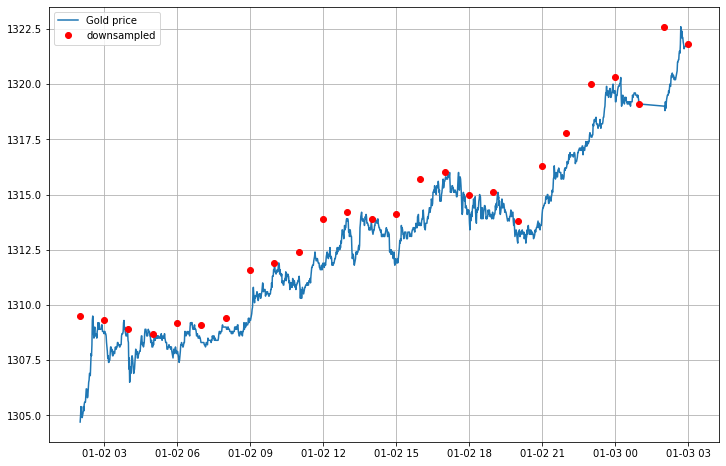

,ts,open,close,vol,high,low
0,2018-01-02 02:00:00,1305.3,1309.5,5284,1309.7,1304.6
1,2018-01-02 03:00:00,1308.8,1309.3,4906,1309.3,1307.3
2,2018-01-02 04:00:00,1308.4,1308.9,7923,1309.0,1306.2
3,2018-01-02 05:00:00,1308.0,1308.7,4039,1308.7,1307.4
4,2018-01-02 06:00:00,1307.8,1309.2,4529,1309.3,1307.3


In [3]:
df = df.iloc[:1440]

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return min(value)

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'first', ## для цены открытия берём первое значение 
    'close':  'max',  ## для цены закрытия - cреднее
    'vol'  :  'sum',   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  myFunc   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('1H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

downsampled.head()

In [4]:
print(f'len(df) = {len(df)}')
print(f'len(downsampled) = {len(downsampled)}')

len(df) = 1440
len(downsampled) = 26


# Upsampling

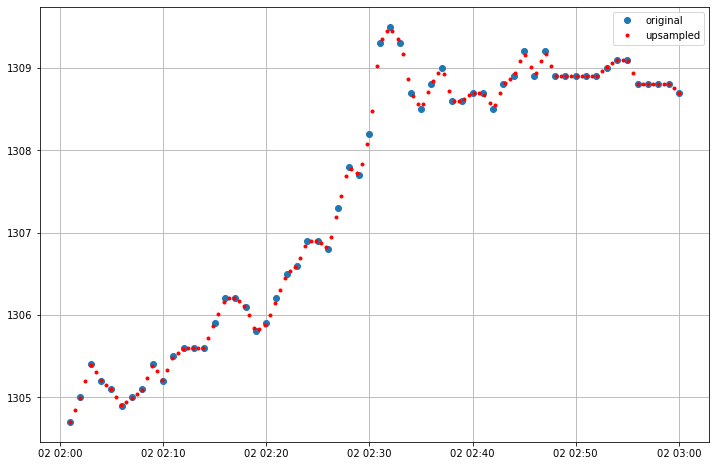

In [5]:
df = pd.read_csv('input/gold_clean.csv')

df['unixtime'] = df.ts
## преобразуем юниксовое время в таймстемп
df['ts'] = pd.to_datetime(df.ts)
## возьмём только первый час данных (60 минут)
df = df.iloc[:60]

## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 120)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
## исходные данные
ax.plot(df.ts, df.close, marker='o', lw=0)
## красными кружками помечаем моменты, в которые мы теперь имеем данные
ax.plot(ts, upsampled, c='r', marker='o', lw=0, markersize=3)
ax.legend(['original', 'upsampled'])
ax.grid()
plt.show()

# Понижение разрешения (Downsampling)

,timestamp,close
0,2018-01-02 02:01:00,1304.7
1,2018-01-02 02:02:00,1305.0
2,2018-01-02 02:03:00,1305.4
3,2018-01-02 02:04:00,1305.2
4,2018-01-02 02:05:00,1305.1


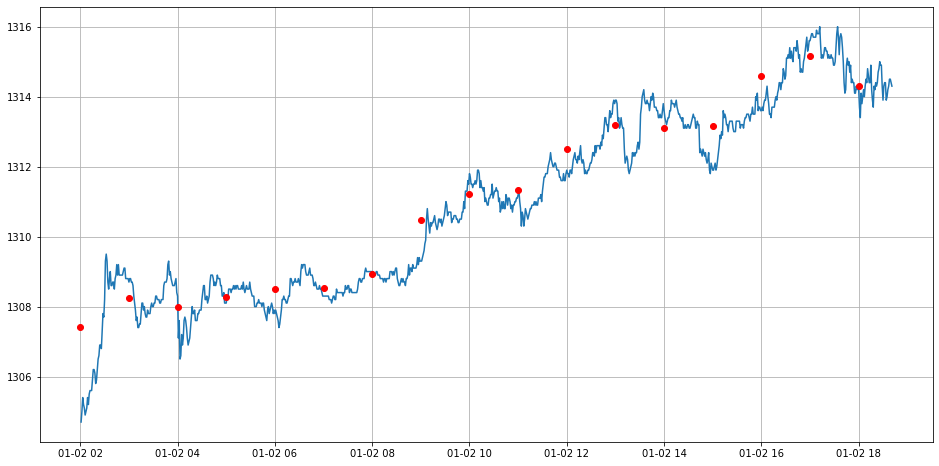

In [6]:
df = pd.read_csv('input/gold_clean.csv')
df = df.iloc[:1000]

df['timestamp'] = pd.to_datetime(df.ts) 

df = df[['timestamp', 'close']]
conversion = {'close' : 'mean'}

df = df.set_index('timestamp')
df_resampled = df.resample('1H').apply(conversion)
df = df.reset_index()
df_resampled = df_resampled.reset_index()

f, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.timestamp, df.close)
ax.plot(df_resampled.timestamp, df_resampled.close, c='r', lw=0, marker='o')
ax.grid()

df.head()

In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

In [8]:
filePath = 'input/EURUSD_1.csv'
data = pd.read_csv(filePath)
data['ts'] = pd.to_datetime(data.ts)
print(f'data.shape = {data.shape}')

data.head()

data.shape = (121674, 6)


,open,high,low,close,vol,ts
0,1.05135,1.05192,1.05134,1.05187,65,2017-01-02 09:00:00
1,1.05185,1.05198,1.05153,1.05168,58,2017-01-02 09:01:00
2,1.05175,1.05201,1.05149,1.05154,33,2017-01-02 09:02:00
3,1.05177,1.05202,1.05177,1.05200,20,2017-01-02 09:03:00
4,1.05202,1.05202,1.05198,1.05202,7,2017-01-02 09:04:00


In [11]:
data['ts'].min()

Timestamp('2017-01-02 09:00:00')

In [43]:
df = data.copy()
# df = df[df.ts < '2017-01-02']

# fig = go.Figure(data  = [go.Candlestick(
#             x=df['ts'],
#             open  = df['open'],
#             high  = df['high'],
#             low   = df['low'],
#             close = df['close']
#         )])

# fig.show()

In [33]:
from numpy import median, mean

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return median(value)*0.5 + mean(value)*0.5

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'median', 
    'close':  'mean',
    'high' :  'max', 
    'low'  :  'min',
    'vol'  :  myFunc
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 8 часа, аггрегируем данные, как описано выше
downsampled = df.resample('8H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

C:\Users\vandr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning:

Mean of empty slice.

C:\Users\vandr\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



In [34]:
downsampled

,ts,open,close,high,low,vol
0,2017-01-02 08:00:00,1.048130,1.048734,1.05233,1.04617,219.877108
1,2017-01-02 16:00:00,1.046490,1.046375,1.04773,1.04498,144.962264
2,2017-01-03 00:00:00,1.047480,1.047341,1.04900,1.04531,240.074113
3,2017-01-03 08:00:00,1.041110,1.042183,1.04889,1.03748,428.573958
4,2017-01-03 16:00:00,1.040885,1.040398,1.04332,1.03402,377.388542
...,...,...,...,...,...,...
345,2017-04-27 08:00:00,1.090245,1.090226,1.09326,1.08797,334.702083
346,2017-04-27 16:00:00,1.087445,1.087243,1.08965,1.08516,327.459375
347,2017-04-28 00:00:00,1.086720,1.086763,1.08756,1.08571,166.290625
348,2017-04-28 08:00:00,1.089965,1.090561,1.09472,1.08567,357.823958


In [36]:
downsampled[downsampled['ts'] == '2017-01-05 08:00:00']

,ts,open,close,high,low,vol
9,2017-01-05 08:00:00,1.05116,1.052138,1.05743,1.04823,481.334375


In [37]:
downsampled[downsampled['ts'] <= '2017-01-03']

,ts,open,close,high,low,vol
0,2017-01-02 08:00:00,1.04813,1.048734,1.05233,1.04617,219.877108
1,2017-01-02 16:00:00,1.04649,1.046375,1.04773,1.04498,144.962264
2,2017-01-03 00:00:00,1.04748,1.047341,1.04900,1.04531,240.074113


In [44]:
df = data.copy()
df['unixtime'] = df.ts.astype(np.int64)
## преобразуем юниксовое время в таймстемп
df['ts'] = pd.to_datetime(df.ts)
## возьмём только первый час данных (60 минут)
## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 120)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

In [46]:
df = data.copy()
df = df[(df.ts >= '2017-01-05 12:00:00') & (df.ts <= '2017-01-05 13:00:00')]
df['unixtime'] = df.ts.astype(np.int64)

fig = go.Figure(data  = [go.Candlestick(
            x=df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

df.head()

,open,high,low,close,vol,ts,unixtime
4491,1.05044,1.05052,1.05032,1.05048,530,2017-01-05 12:00:00,1483617600000000000
4492,1.05048,1.05053,1.05031,1.05046,447,2017-01-05 12:01:00,1483617660000000000
4493,1.05046,1.05080,1.05046,1.05075,516,2017-01-05 12:02:00,1483617720000000000
4494,1.05075,1.05093,1.05063,1.05087,477,2017-01-05 12:03:00,1483617780000000000
4495,1.05087,1.05118,1.05087,1.05101,456,2017-01-05 12:04:00,1483617840000000000


При помощи функции np.linspace создайте сетку, состоящую из 135 точек во времени (используя колонку unixtime). После чего, используя функцию np.interp, проинтерполируйте значения колонки close на созданной сетке.

Укажите среднее значение интерполированного ряда, округлив его до шестого знака после запятой.

In [48]:
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 135)
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

In [50]:
upsampled.mean()

1.0502950326146914